# Humanitarian Aid Analysis

Zaki Syaiful Hunafa

RMT-018

## 1. Introduction


Based on the given data, the non-profit organization has committed itself to fighting poverty and providing basic facilities and aid to communities in less developed countries. The organization has recently collected around $10 million, and the CEO needs to decide how to use this money strategically and effectively. One significant issue that arises when making this decision is the selection of which country needs the aid the most.

To address this issue, an unsupervised machine learning model using KMeans can be developed to group the countries based on their needs. The KMeans clustering algorithm can be used to group the countries based on their similarities in terms of poverty, access to basic facilities, and other socioeconomic factors.

After running the KMeans model, the countries can be grouped into clusters based on their similarities. The countries that fall under the same cluster can be considered to have similar needs and can be given priority for aid.

After the model is made, it will also be evaluate using 3 methods:
 - Sum of squared error
 - Rand Score
 - Silhoutte score 
to make sure, the number of cluster given is well representing the data.

The model can be used to recommend the countries that fall under the cluster with the highest need for aid to the CEO. It is important to note that the recommendations should be based on a comprehensive analysis of the data and not solely on the model's output. The CEO should also take into consideration other factors such as the political stability, social infrastructure, and existing aid programs in the recommended countries.

Overall, the unsupervised machine learning model using KMeans can be a useful tool to aid the CEO in making data-driven decisions about the allocation of the organization's funds to countries that need it the most.

## 2. Import Libraries

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To standardize data
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler

# Classifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

from sklearn.decomposition import PCA

# Create pipeline
from sklearn.pipeline import Pipeline

# Transform column
from sklearn.compose import ColumnTransformer


# Save model
import json
import joblib

# metrics
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading

In [217]:
df = pd.read_csv('humanitarian-aid.csv')

In [218]:
# read first 10 rows
df.head(10)

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [219]:
# read last 10 rows
df.tail(10)

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35000
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900
159,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


From the above dataset, here is the description of each column:

Name | Definition
---|---
`country` | Name of the country
`child_mortality` | Death of children under 5 years of age per 1000 live births
`exports` | Export of goods and services. Given as percentage of the Total GDP
`health` | Total health spending as percentage of Total GDP
`imports` | Imports of goods and services. Given as percentage of the Total GDP
`income` | Net income per person
`inflation` | The measurement of the annual growth rate of the Total GDP
`life_expectancy` | The average number of years a new born child would live if the current mortality patterns remain the same
`total_fertility` | The number of children that would be born to each woman if the current age-fertility rates remain the same
`gdpp` | The GDP per capita. Calculated as the Total GDP divided by the total population.

In [220]:
# check shape of the df
df.shape

(167, 10)

In [221]:
# check duplicated rows
df.duplicated().sum()

0

In [222]:
# check empty rows
df.isnull().sum()

country            0
child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
dtype: int64

In [223]:
# define categorical columns and numerical columns
num_cols = df.columns[df.dtypes != 'O'].to_list()
cat_cols = ['country']

## 4. Exploratory Data Analysis (EDA)

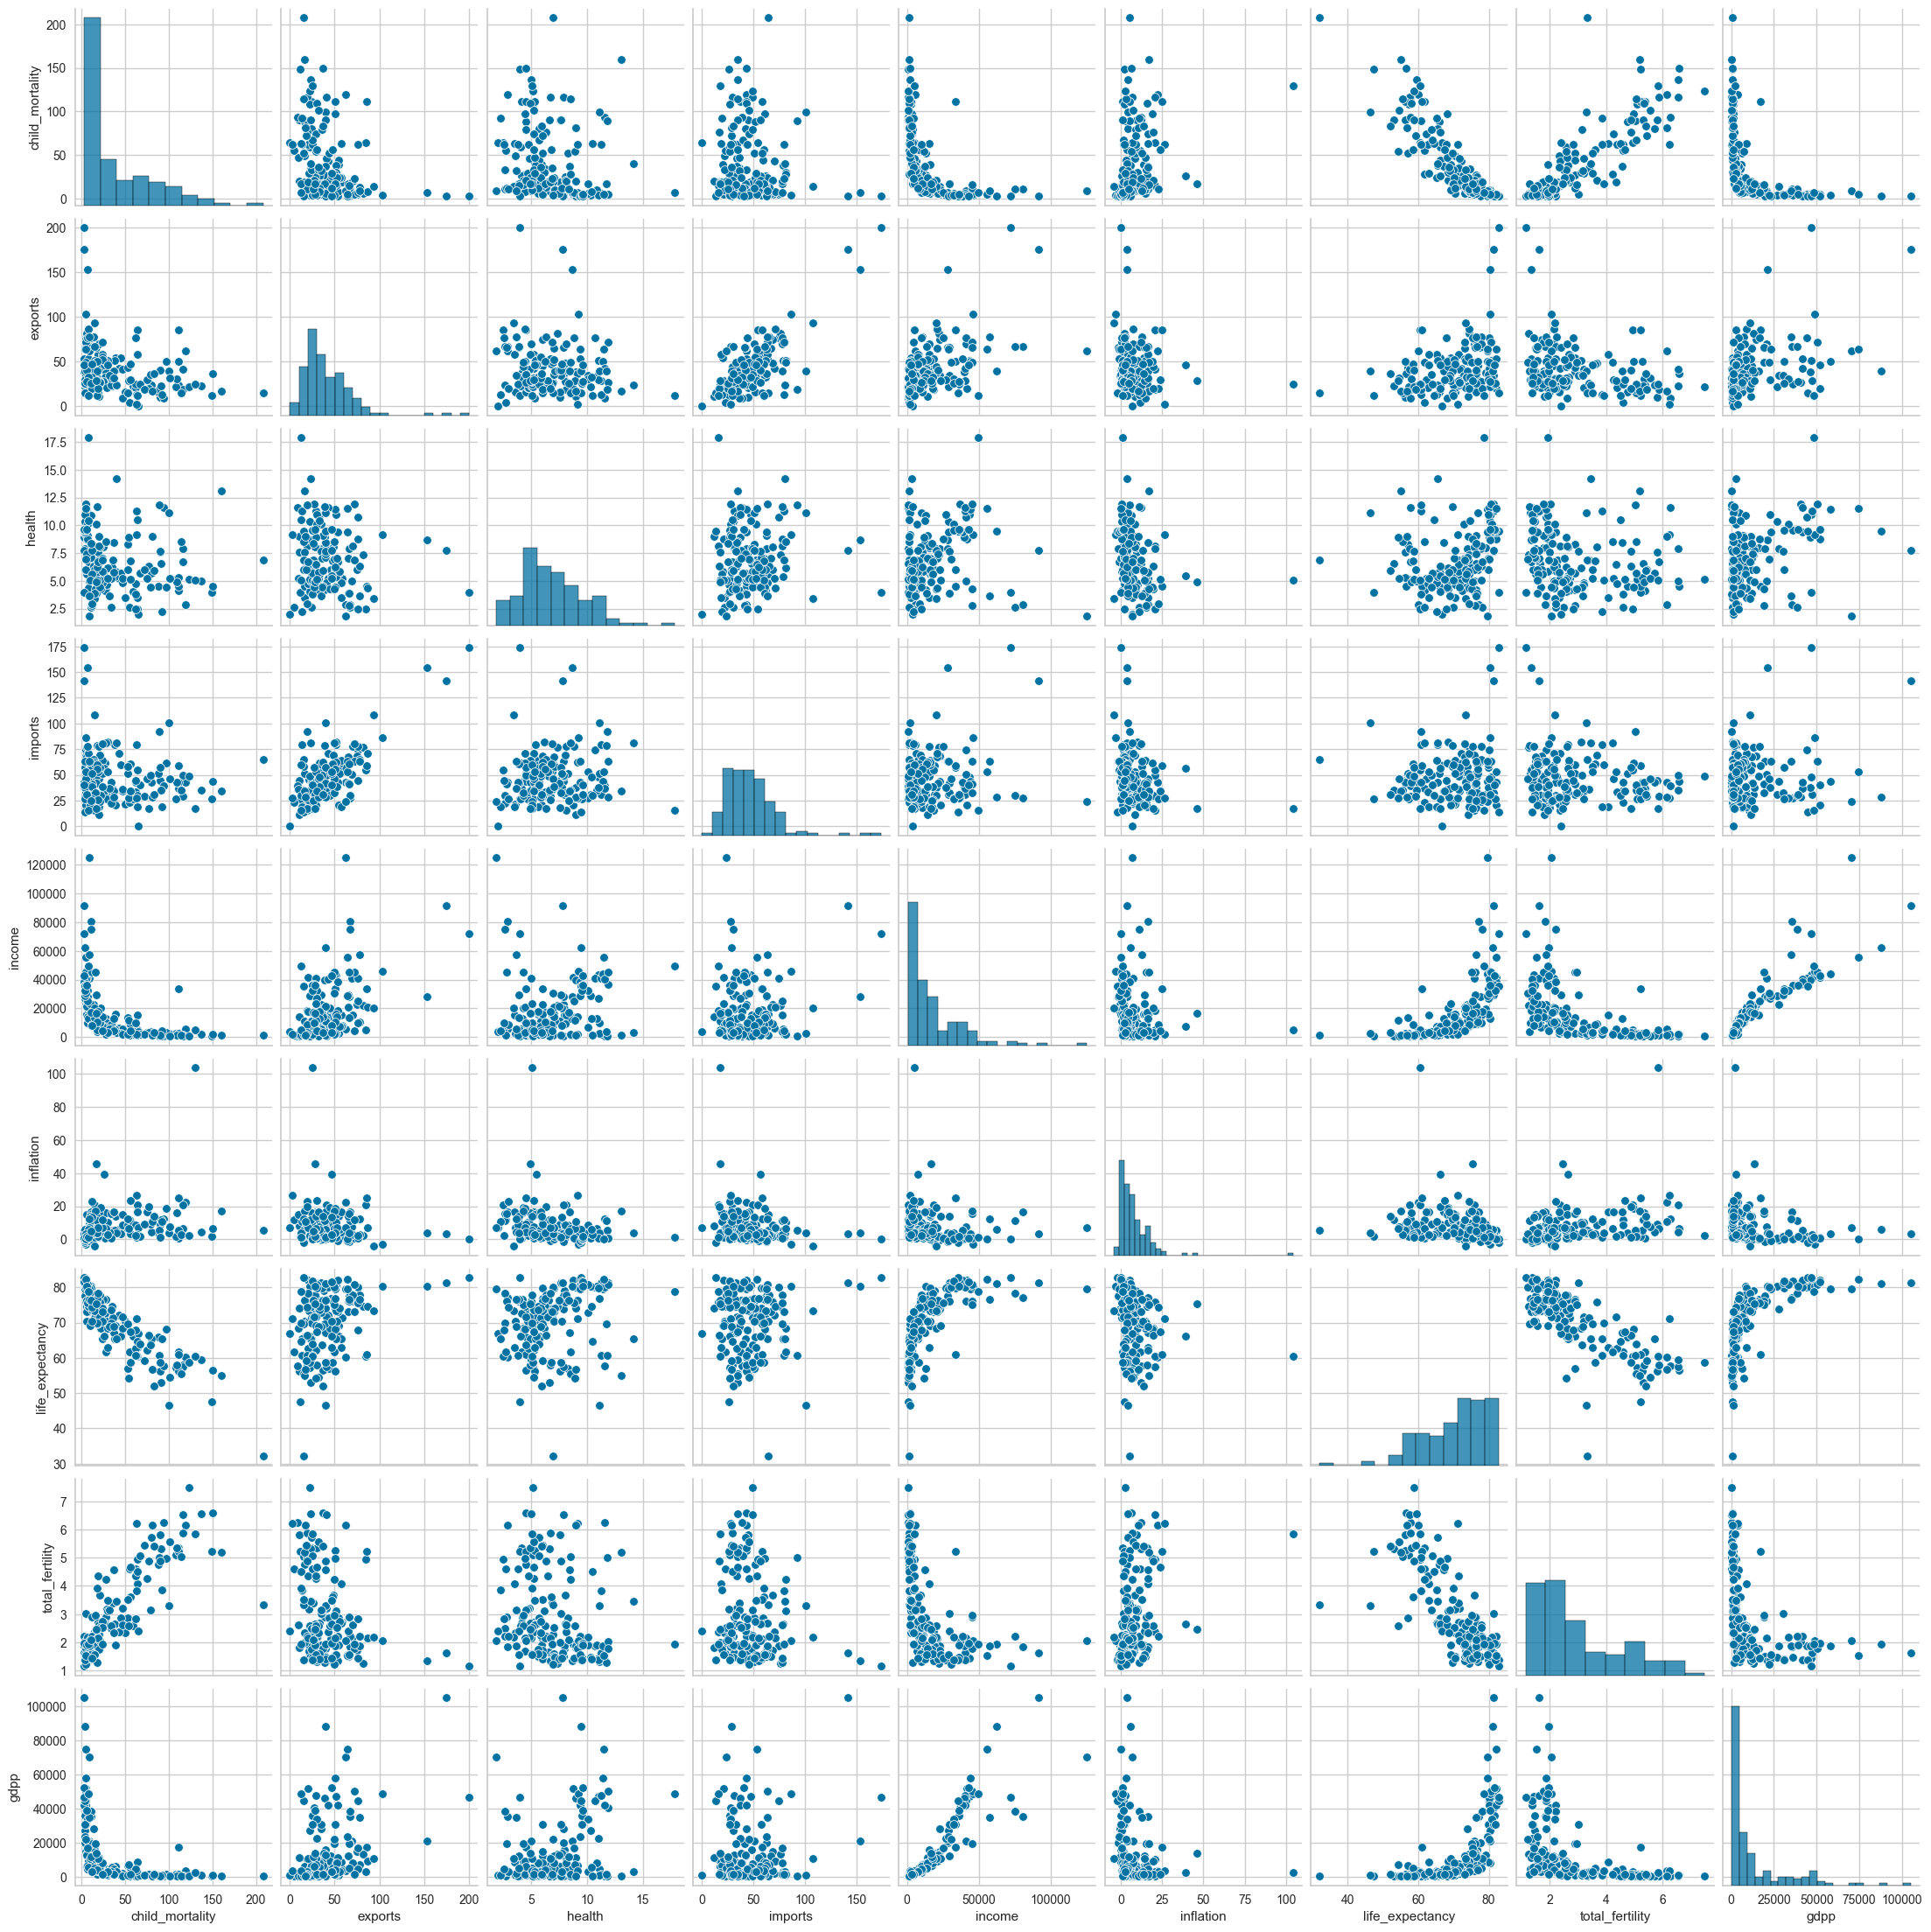

In [224]:
sns.pairplot(df[num_cols])

here we can see the distribution of each features towards each other. for example the higher net income per person will contribute to higher gddp and the country might be a wealth country. country with high gdpp also have low rate of inflation.

<Axes: >

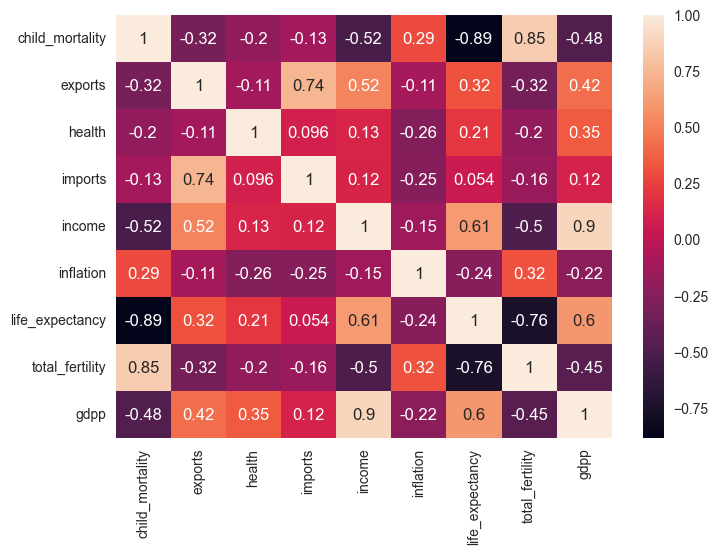

In [225]:
sns.heatmap(df[num_cols].corr(), annot=True)

here we can see the correlation between each features. yet i will be using all features due to its bias towards gddp

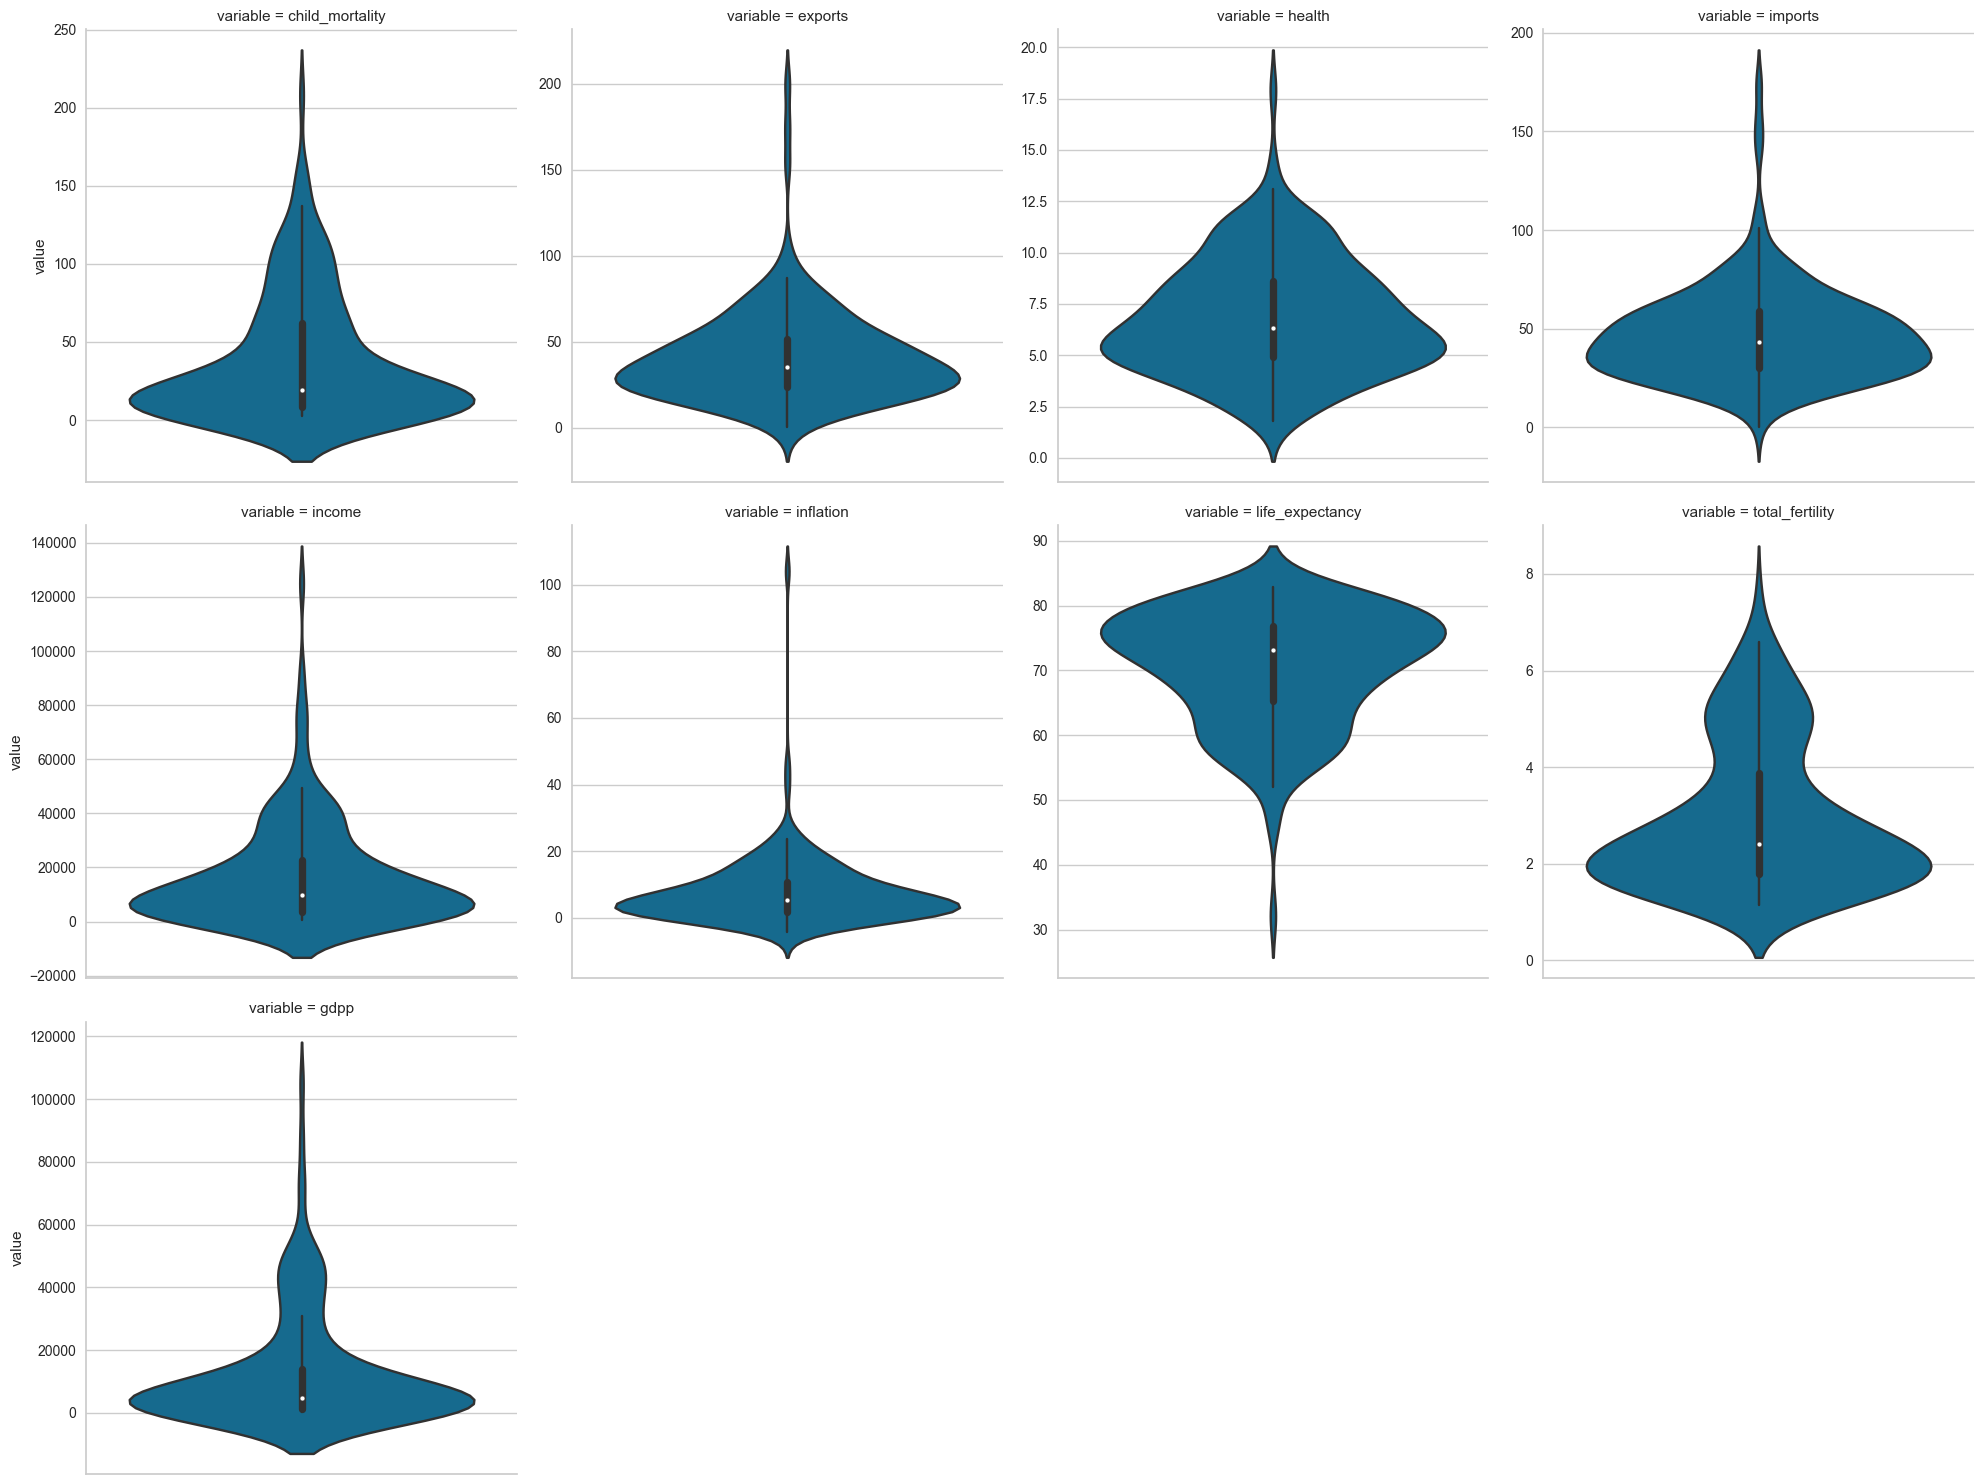

In [226]:
sns.catplot(data= pd.melt(df, value_vars= num_cols),
            kind='violin',
            y = 'value',
            col = 'variable',
            sharey=False,
            col_wrap=4)
plt.show()

from this plot we can see that most of features are not normally distributed, even some are heavily skewed such as `inflation`, `exports`, and `income`. because i believe it will contribute towards the clustering of the country duea to KMeans is senstive to outliers, i will handle it using capping method.

## 5. Feature Engineer

### Handling Outliers

In [227]:
# cap outliers
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=num_cols)
new_df = wins.fit_transform(df)

<Axes: >

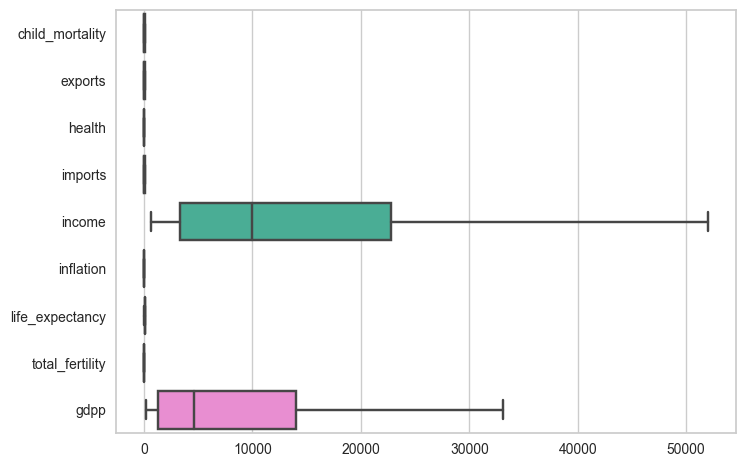

In [228]:
sns.boxplot(new_df[num_cols], orient='h')

### Scale Num Cols

In [229]:
# using standardscaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df[num_cols])
df_scaled

array([[ 1.36980194, -1.39110684,  0.29601312, ..., -1.70222504,
         1.91527602, -0.84634107],
       [-0.55046422, -0.54354731, -0.09119005, ...,  0.66332125,
        -0.86277926, -0.54082746],
       [-0.27129509, -0.05384625, -0.98589252, ...,  0.68685903,
        -0.03669088, -0.50886816],
       ...,
       [-0.37565738,  1.52826487,  0.01782832, ...,  0.28671687,
        -0.66291917, -0.78095407],
       [ 0.48533152, -0.44937403, -0.60620786, ..., -0.37234081,
         1.14914567, -0.78095407],
       [ 1.18455887, -0.11976755, -0.33930082, ..., -2.19651829,
         1.63547189, -0.7679976 ]])

### PCA

In [230]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

## 6. Model Definition

In [231]:
# define model KMeans
model = KMeans()

## 7. Model Training

### Look for best K: Elbow Method

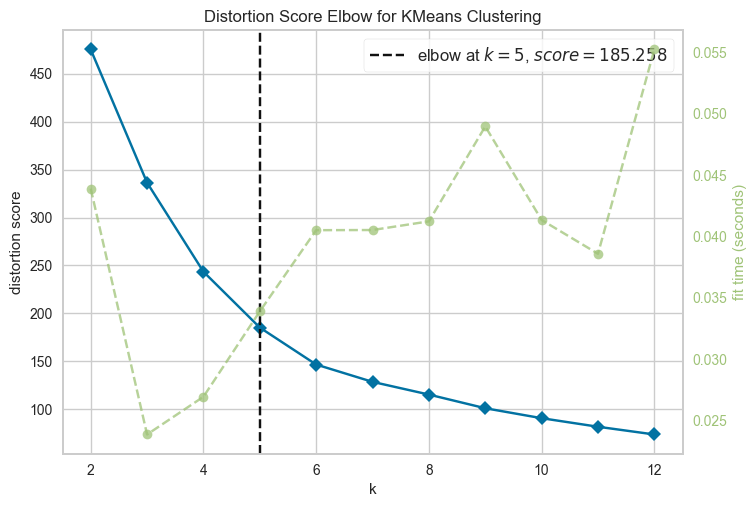

In [232]:
for i in range(2,10):
    model = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k = 12)
visualizer.fit(reduced_data)
visualizer.show()
plt.show()

In [233]:
# define final model with n_cluster = 5
km = KMeans(n_clusters=5, random_state=42)
km.fit(reduced_data)

KMeans(n_clusters=5, random_state=42)

In [234]:
# predict
cluster = km.predict(reduced_data)

In [235]:
# define new cols
reduced_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_data['cluster'] = cluster
reduced_data

,PC1,PC2,cluster
0,-3.177917,-0.251292,0
1,0.434979,-0.218700,2
2,-0.416784,-0.613870,2
3,-3.306409,1.066649,0
4,1.253246,0.547778,2
...,...,...,...
162,-0.882087,0.945856,4
163,-0.240053,-1.742315,2
164,0.305579,2.152785,4
165,-2.271105,-0.554296,0


In [236]:
pca_df_cluster = pd.concat([df, reduced_data], axis=1)
pca_df_cluster

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,PC1,PC2,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-3.177917,-0.251292,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.434979,-0.218700,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.416784,-0.613870,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-3.306409,1.066649,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.253246,0.547778,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-0.882087,0.945856,4
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-0.240053,-1.742315,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.305579,2.152785,4
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-2.271105,-0.554296,0


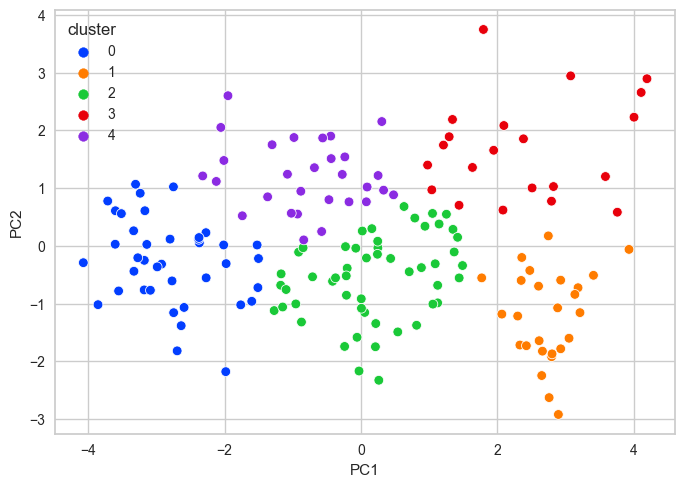

In [237]:
sns.scatterplot(data = pca_df_cluster, x='PC1', y='PC2', hue='cluster', palette='bright')
plt.show()

Since the aid is allocated for poor country, here i will make priority of cluster of country whom the aid should be distributed to. This clustering is based on the features that positively correlated towards gdpp, hence the clustering will be: 
* Cluster 0: This is the country with `low-income economies` and `high social issues` such as child mortality, health, life expetancy and such. This is the cluster of country that should be `prioritized the most` for tha aid
* Cluster 1: This is the countries with `High income economies` and `low social issues`, this country `will not get the aid`
* Cluster 2: This cluster contains countries with `upper-middle-income economies` and `high social issues`, this cluster will be `in the last priority`
* Cluster 3: This is the countries with `High income economies` yet still `have concerning social issues`, this country `will not get the aid`
* Cluster 4: This cluster contains countries with `lower-middle-income economies` and `high social issues`, this cluster will be `in the 2nd priority`

## 8. Model Evaluation

### Eval 1: Sum of Squared Error

In [238]:
sse = []
for i in range(2,10):
    model = KMeans(n_clusters = i, random_state=42)
    model.fit(reduced_data)
    sse_ = model.inertia_
    sse.append(sse_)
    print(i, sse_)

2 724.641489556428
3 456.40182224343425
4 311.07893660084363
5 185.25811628833907
6 154.78005034507015
7 137.6050133787498
8 121.67801363758596
9 107.16435283983944


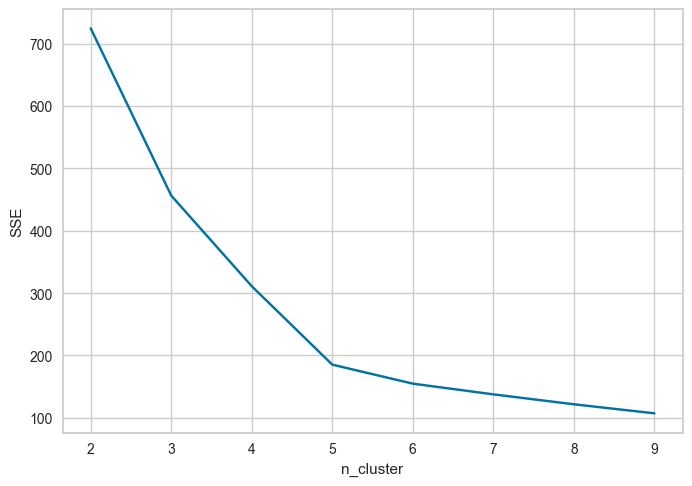

In [239]:
plt.plot(range(2,10), sse)
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

To evaluate the performance of a k-means model, we can calculate the SSE for different numbers of clusters and choose the value that minimizes the SSE. This is typically done using an elbow plot, which plots the SSE against the number of clusters. The elbow point is the point where the rate of decrease in SSE slows down, indicating that adding more clusters does not lead to significant improvement in clustering quality.

As the number of clusters increases, the SSE decreases. However, we can see that the rate of decrease in SSE slows down after 4 clusters. This suggests that 4 clusters might be the optimal number for this data set. However, the exact number of clusters to choose depends on the specific problem and domain knowledge.

### Eval 2: Rand Score

In [240]:
rand = []
for i in range(2,10):
    model = KMeans(n_clusters= i, random_state=42)
    model.fit(reduced_data)
    rand_ = metrics.adjusted_rand_score(cluster, model.labels_)
    rand.append(rand_)
    print(i,rand_)

2 0.26989799597097874
3 0.46563820848903154
4 0.861410442963935
5 1.0
6 0.8239994955601321
7 0.7231439795285437
8 0.7292193786256022
9 0.6627433512070768


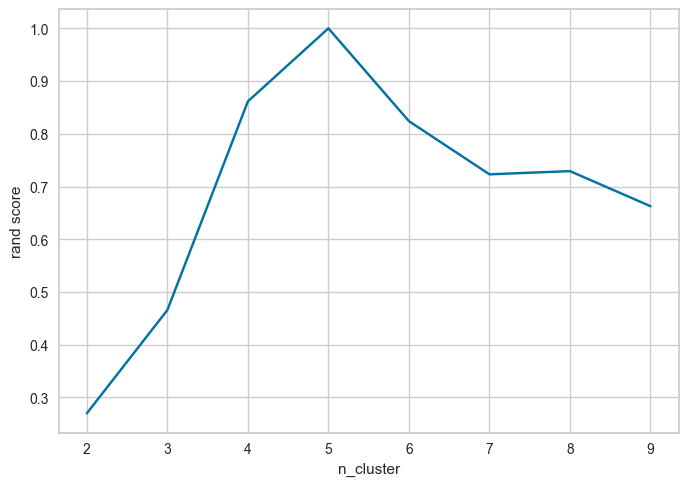

In [241]:
plt.plot(range(2,10), rand)
plt.xlabel('n_cluster')
plt.ylabel('rand score')
plt.show()

The Rand Index is a measure of the similarity between two sets of data labels, such as the predicted cluster assignments and the true cluster assignments. The Rand Index takes on values between 0 and 1, with higher values indicating better agreement between the two sets of labels.

To evaluate the performance of a k-means model, we can calculate the Rand Index for different numbers of clusters and choose the value that maximizes the Rand Index. This is typically done using a plot of the Rand Index against the number of clusters.

We can see that the Rand Index increases as the number of clusters increases. However, the Rand Index reaches its maximum value at 5 clusters. This suggests that 5 clusters might be the optimal number for this data set.

### Eval 3: Silhouette Score

For n_cluster= 5 The average silhouette_score is: 0.41
For n_cluster= 6 The average silhouette_score is: 0.41
For n_cluster= 7 The average silhouette_score is: 0.41


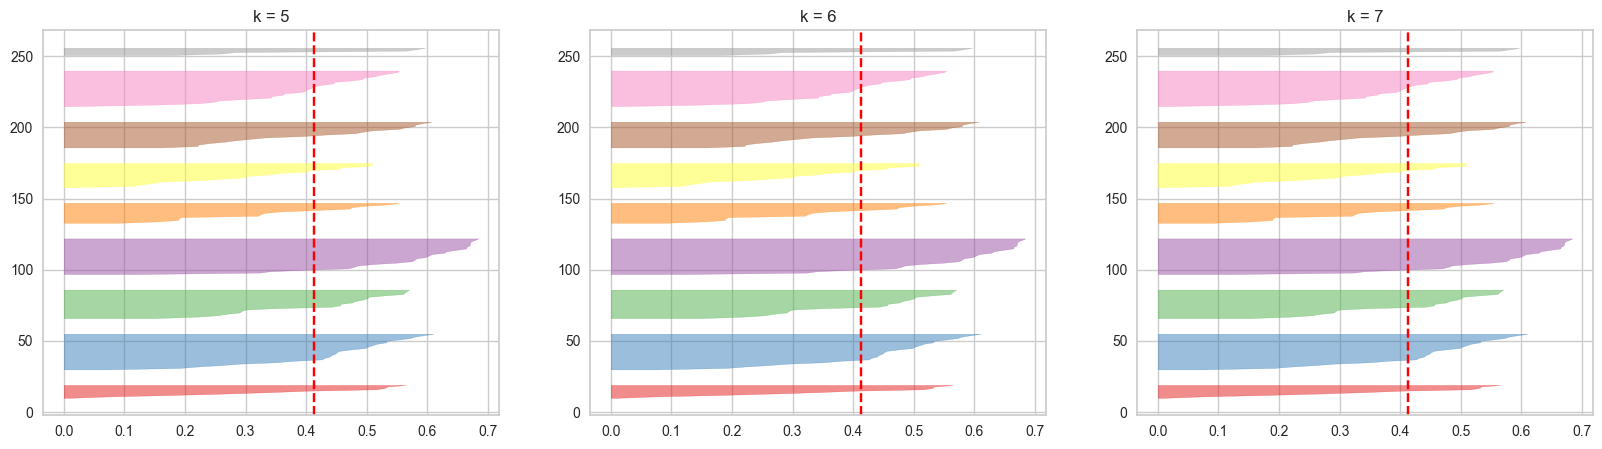

In [242]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
col = 0
for k in [5,6,7]:
    model = KMeans(n_clusters=i, random_state=42)
    visualizer = SilhouetteVisualizer(model, ax=ax[col])
    visualizer.fit(reduced_data)
    ax[col].set_title(f'k = {k}')
    col += 1
    print('For n_cluster=', k, 'The average silhouette_score is:', round(np.mean(visualizer.silhouette_score_), 2))

here sicne the avg of 3 clusters that we analyze are the same and the distribution of each clusters are also the same then this model is not effective to evaluate this model.

## 9. Save Model

In [243]:
# define col transformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols),
        ('pca', pca, num_cols)
    ])

# define pipeline
pipe = Pipeline(steps=[
    ('preprocessorr', preprocessor),
    ('KMeans', km)
])

# fit the pipeline
pipe.fit(df)

Pipeline(steps=[('preprocessorr',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['child_mortality', 'exports',
                                                   'health', 'imports',
                                                   'income', 'inflation',
                                                   'life_expectancy',
                                                   'total_fertility', 'gdpp']),
                                                 ('pca', PCA(n_components=2),
                                                  ['child_mortality', 'exports',
                                                   'health', 'imports',
                                                   'income', 'inflation',
                                                   'life_expectancy',
                                                   'total_fertility',
                                                   'gdpp'])])),
                ('KMeans', KMeans(n_clusters=5, random_state=42))])

In [244]:
# save model
# Saving pipeline as pipeline.pkl
with open ('pipeline.pkl', 'wb') as file_1:
    joblib.dump(pipe, file_1)

with open('list_num_cols.txt', 'w') as file_2:
    json.dump(num_cols, file_2)

with open('list_cat_cols.txt', 'w') as file_3:
    json.dump(cat_cols, file_3)

## 11. Inference

In [245]:
data_inf = {
 'country': 'Indonesia',
 'child_mortality': 12,
 'exports':21,
 'health':321,
 'imports':123,
 'income':21312,
 'inflation':213,
 'life_expectancy':123,
 'total_fertility':123,
 'gdpp':12,
 'PC1':32,
 'PC2':123
}

data_inf = pd.DataFrame([data_inf])
data_inf

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,PC1,PC2
0,Indonesia,12,21,321,123,21312,213,123,123,12,32,123


In [246]:
cluster = pipe.predict(data_inf)
if cluster == 0:
    print("The country should be prioritized of the aid")
elif cluster == 4:
    print('The country is prioritized 2nd for the aid')
elif cluster == 2:
    print('The country is last priority for the aid')
else:
    print('The country SHOULD NOT get the aid')

The country SHOULD NOT get the aid


## 12. Conclusion

The n_cluster found using elbow method is 5, however when I evaluate using SSE and Rand score it shows 4 and 5 respectively. Here I believe 5 is still the best due to the same avg and distribution of cluster if we evaluate using silhouette score. `Due to limited of time`, the analysis might not be ideal yet here are the improvement we can make for further analysis:

* There are several ways to improve the performance of a k-means model:

* Scaling the data: K-means is sensitive to the scale of the input features, so it is important to normalize or standardize the data before clustering.

* Tuning hyperparameters: K-means has two important hyperparameters: the number of clusters (k) and the initialization method. Experimenting with different values for these hyperparameters can help improve the performance of the model.

* Trying different clustering algorithms: K-means is just one of many clustering algorithms, and different algorithms may be more suitable for different types of data. Hierarchical clustering, DBSCAN, and Gaussian mixture models are all popular alternatives to k-means.

* Feature engineering: Sometimes, adding or removing features from the input data can improve the performance of the model. It may be useful to explore the correlation between the input features and the target variable, and to remove or combine redundant or irrelevant features.

* Incorporating domain knowledge: In some cases, domain knowledge can help inform the choice of features or hyperparameters for the clustering algorithm. For example, in a customer segmentation task, it may be useful to cluster customers based on their purchasing behavior rather than just their demographic information.



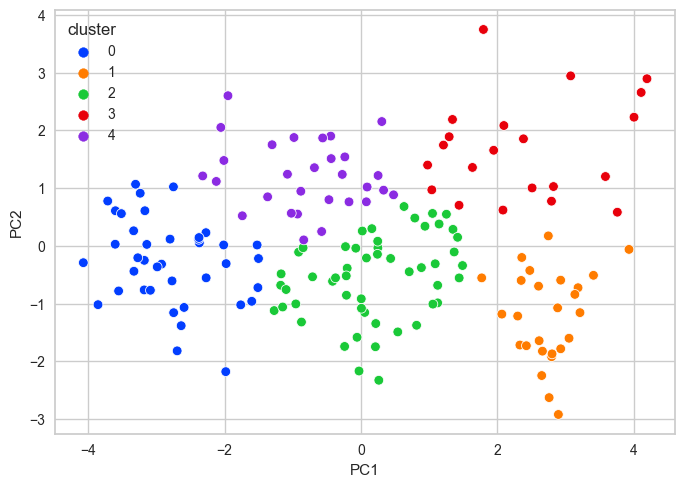

In [247]:
sns.scatterplot(data = pca_df_cluster, x='PC1', y='PC2', hue='cluster', palette='bright')
plt.show()

Since the aid is allocated for poor country, here i will make priority of cluster of country whom the aid should be distributed to. This clustering is based on the features that positively correlated towards gdpp, hence the clustering will be: 
* Cluster 0: This is the country with `low-income economies` and `high social issues` such as child mortality, health, life expetancy and such. This is the cluster of country that should be `prioritized the most` for tha aid
* Cluster 1: This is the countries with `High income economies` and `low social issues`, this country `will not get the aid`
* Cluster 2: This cluster contains countries with `upper-middle-income economies` and `high social issues`, this cluster will be `in the last priority`
* Cluster 3: This is the countries with `High income economies` yet still `have concerning social issues`, this country `will not get the aid`
* Cluster 4: This cluster contains countries with `lower-middle-income economies` and `high social issues`, this cluster will be `in the 2nd priority`

In [248]:
print('The country that should be prioritized the most for the aid are:')
print(' ')
print(pca_df_cluster[pca_df_cluster.cluster == 0].country.unique())
print('-'*42)
print('The country that should get the aid next aer:')
print(' ')
print(pca_df_cluster[pca_df_cluster.cluster == 4].country.unique())
print('-'*42)
print('The country that should prioritized the last to get the aid are:')
print(' ')
print(pca_df_cluster[pca_df_cluster.cluster == 2].country.unique())
print('-'*42)
print('The country that SHOULD NOT get the aid are:')
print(' ')
print(pca_df_cluster[(pca_df_cluster.cluster == 1) | (pca_df_cluster.cluster == 3)].country.unique())
print('-'*42)


The country that should be prioritized the most for the aid are:
 
['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 "Cote d'Ivoire" 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'India' 'Kenya' 'Madagascar' 'Malawi' 'Mali'
 'Mozambique' 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste'
 'Uganda' 'Yemen' 'Zambia']
------------------------------------------
The country that should get the aid next aer:
 
['Belarus' 'Belize' 'Bhutan' 'Botswana' 'Cambodia' 'Cape Verde'
 'Congo, Rep.' 'Equatorial Guinea' 'Fiji' 'Guyana' 'Jordan' 'Kiribati'
 'Kyrgyz Republic' 'Lao' 'Lesotho' 'Liberia' 'Mauritania'
 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Namibia' 'Paraguay' 'Samoa'
 'Solomon Islands' 'Togo' 'Tonga' 'Turkmenistan' 'Vanuatu' 'Vietnam']
------------------------------------------
The country that should prio

## 13. Reference

- https://towardsdatascience.com/explain-ml-in-a-simple-way-k-means-clustering-e925d019743b
- https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
- https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups
